# Assignment 8 - Linear Regression

## Problem statement 2
A logistics company recorded the time taken for delivery and the time taken for the sorting of the items for delivery. Build a Simple Linear Regression model to find the relationship between delivery time and sorting time with delivery time as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

## 1. Business Problem

1.1 What is the business objective?

- To build a Simple Linear Regression model that predicts delivery time based on sorting time.
- To apply different transformations (logarithmic, exponential, polynomial) and evaluate each model.
- To identify the best-fit model using metrics like RMSE, R-squared, and correlation coefficient.

1.2 Are there any constraints?
- Limited features: only two variables (sorting time and delivery time) are used.

- Assumes linear or transformable relationships between the variables.

- Quality of prediction may be affected by outliers or noise in the data.

- Potential missing or inconsistent values in the dataset.

## Data Dictionary
![Screenshot 2025-04-10 224616.png](<attachment:Screenshot 2025-04-10 224616.png>)
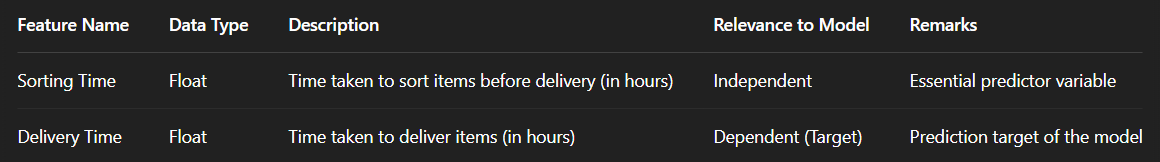

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('delivery_time.csv')

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
data.shape

(21, 2)

## 3.Data Pre-processing

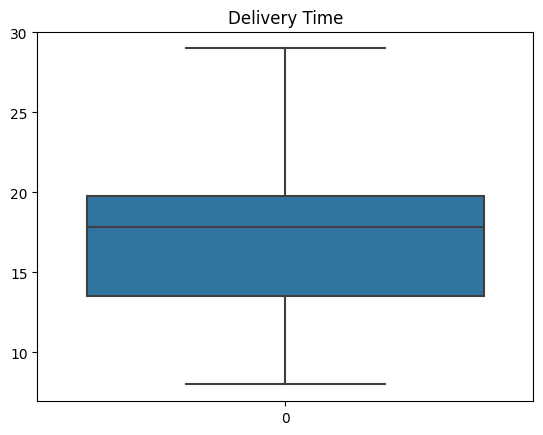

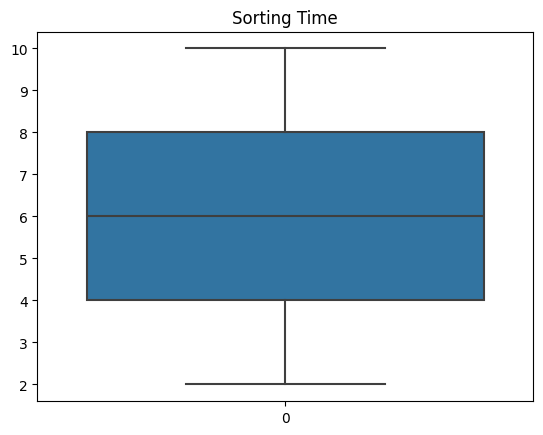

In [8]:
#outlier detection
for i in data.columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [9]:
#no outliers

## 4.EDA

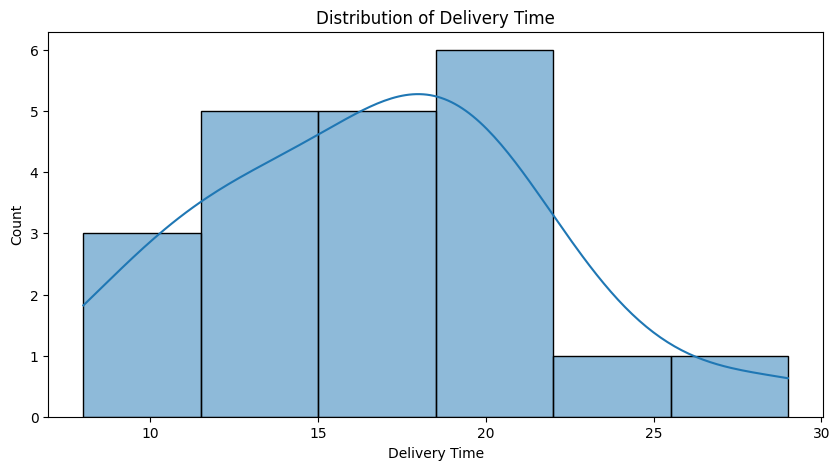

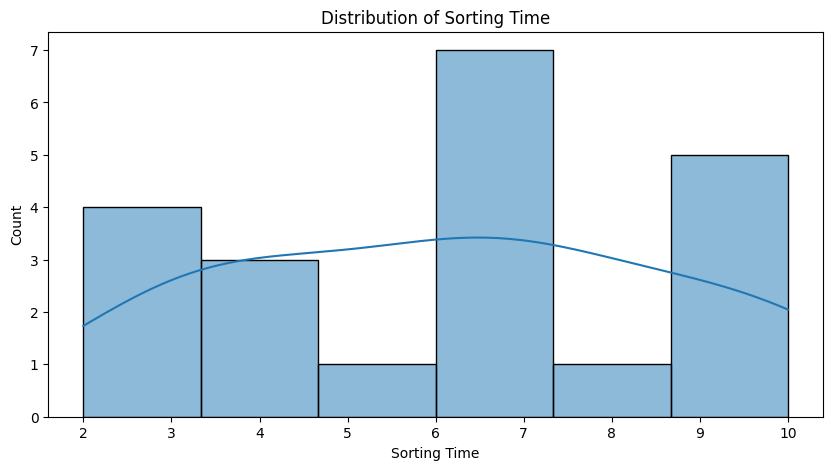

In [10]:
#Univariate analysis
plt.figure(figsize=(10, 5))
sns.histplot(data['Delivery Time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data['Sorting Time'], kde=True)
plt.title('Distribution of Sorting Time')
plt.show()

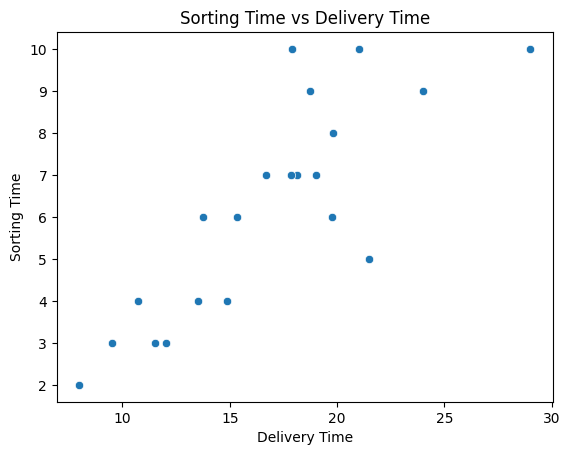

In [11]:
#Bivariate analysis
sns.scatterplot(x='Delivery Time', y='Sorting Time', data=data)
plt.title('Sorting Time vs Delivery Time')
plt.show()

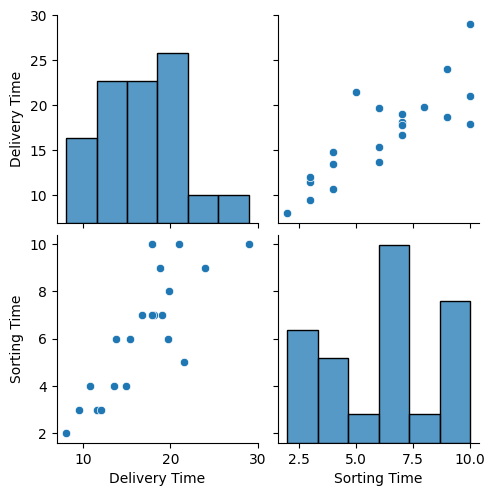

In [16]:
sns.pairplot(data)

In [12]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

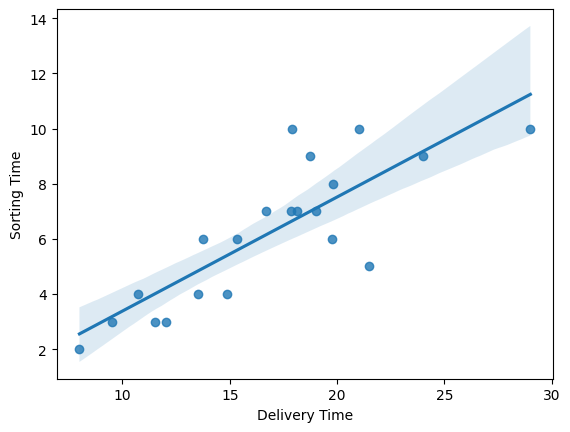

In [13]:
#scatterplot with regression line
sns.regplot(x=data['Delivery Time'],y=data['Sorting Time'])

<Axes: >

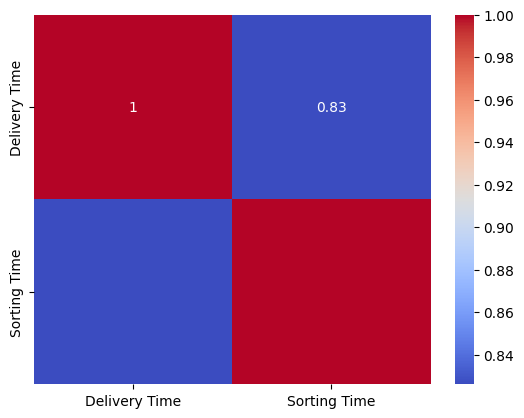

In [15]:
#correlation matrix
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

## 5.Model Building

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [18]:
#Simple Linear Regression model
X = data[['Delivery Time']]
y = data['Sorting Time']


In [19]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Simple Linear Regression - RMSE: {rmse}, R-Squared: {r2}')

Simple Linear Regression - RMSE: 2.0713126959981585, R-Squared: 0.40411996047178333


In [24]:
# Log Transformation
X_log = np.log(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)

model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2_log = r2_score(y_test_log, y_pred_log)
print(f'Log Transformation - RMSE: {rmse_log}, R-Squared: {r2_log}')

Log Transformation - RMSE: 1.9884277107601194, R-Squared: 0.4508548943168432


In [25]:
# Polynomial Transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Transformation - RMSE: {rmse_poly}, R-Squared: {r2_poly}')

Polynomial Transformation - RMSE: 1.9492835907152517, R-Squared: 0.47226298374559095


In [26]:
# Choose the best fit model
best_model = min([(rmse, r2, 'Simple Linear Regression'), (rmse_log, r2_log, 'Log Transformation'), (rmse_poly, r2_poly, 'Polynomial Transformation')])

print(f'Best Model: {best_model[2]} with RMSE: {best_model[0]} and R-Squared: {best_model[1]}')


Best Model: Polynomial Transformation with RMSE: 1.9492835907152517 and R-Squared: 0.47226298374559095


In [27]:
# Benefits/Impact of the solution
# This model helps the logistics company to optimize their sorting processes to reduce delivery time, 
#leading to improved efficiency and customer satisfaction.